In [17]:
!pip3 install opencv-python
!pip3 install matplotlib

You should consider upgrading via the '/home/adrian/Desktop/ML/venv_ml/bin/python -m pip install --upgrade pip' command.
  Using cached matplotlib-3.5.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 4.3 MB 1.2 MB/s            
  Using cached pyparsing-3.0.7-py3-none-any.whl (98 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
     |████████████████████████████████| 895 kB 7.7 MB/s            
  Using cached kiwisolver-1.3.2-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
You should consider upgrading via the '/home/adrian/Desktop/ML/venv_ml/bin/python -m pip install --upgrade pip' command.


In [5]:
!wget -nc https://pytorch.org/tutorials/_images/cat_superres_with_ort.jpg

File ‘cat_superres_with_ort.jpg’ already there; not retrieving.



In [6]:
import requests
import cv2
import json
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt

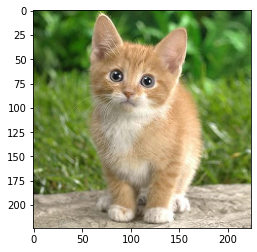

[[('n02124075', 'Egyptian_cat', 0.49496153), ('n02123597', 'Siamese_cat', 0.109250821), ('n02123045', 'tabby', 0.100622192), ('n02127052', 'lynx', 0.0789352134), ('n02119789', 'kit_fox', 0.0723191947)]]
Process time: 0.21688294410705566 [s]


In [9]:
image = cv2.imread("cat_superres_with_ort.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
plt.imshow(image)
image = np.expand_dims(image, axis = 0)
plt.show()
start_time = time.time()
url = "http://localhost:8501/v1/models/vgg16:predict"
data = json.dumps({"signature_name": "serving_default", "instances": image.tolist()})

headers = {"content-type":"application/json"}

response = requests.post(url, data=data, headers=headers)
prediction = json.loads(response.text)["predictions"]
result = tf.keras.applications.imagenet_utils.decode_predictions(np.array(prediction))
print(result)
print("Process time:", time.time()-start_time, "[s]")